# Overview

**What is Speech Emotion Recognition?**

Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.



**Objective**

To build a model to recognize emotion from speech using the librosa and sklearn libraries and the RAVDESS dataset.

**The Dataset**

For this Python project, we’ll use the RAVDESS dataset; this is the Ryerson Audio-Visual Database of Emotional Speech and Song dataset, and is free to download. This dataset has 7356 files rated by 247 individuals 10 times on emotional validity, intensity, and genuineness. The entire dataset is 24.8GB from 24 actors, but we’ve lowered the sample rate on all the files.

**Methodology**

In this Python mini project, we will use the libraries librosa, and sklearn (among others) to build a model using an RandomForestClassifier. This will be able to recognize emotion from sound files. We will load the data, extract features from it, then split the dataset into training and testing sets. Then, we’ll initialize an RandomForestClassifier and train the model. Finally, we’ll calculate the accuracy of our model.

# Setup

Import and Unzip files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/ML_Datasets/SpeechEmotionRecognition/speech-emotion-recognition-ravdess-data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preprocessing

Capturing the paths of all the audio files in **audio_files**.

In [ ]:
audio_files = glob('/content/dataset/Actor_*/*.wav')

Filename identifiers

* **Modality** (01 = full-AV, 02 = video-only, 03 = audio-only).
* **Vocal channel** (01 = speech, 02 = song).
* **Emotion** (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* **Emotional intensity** (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* **Statement** (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* **Repetition** (01 = 1st repetition, 02 = 2nd repetition).
* **Actor** (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
print(audio_files[0])

/content/dataset/Actor_05/03-01-06-01-02-02-05.wav


Analysing an Audio file

In [ ]:
ipd.Audio(audio_files[0])

y -> Raw Data of the audio file

sr-> Sample Rate

In [ ]:
y, sr = librosa.load(audio_files[0])
print(f'y : {y}')
print(f'sr: {sr}')

y : [ 1.5672077e-09  1.2795076e-10 -2.0955966e-09 ...  7.4444340e-12
 -5.5958547e-14  2.8536852e-12]
sr: 22050


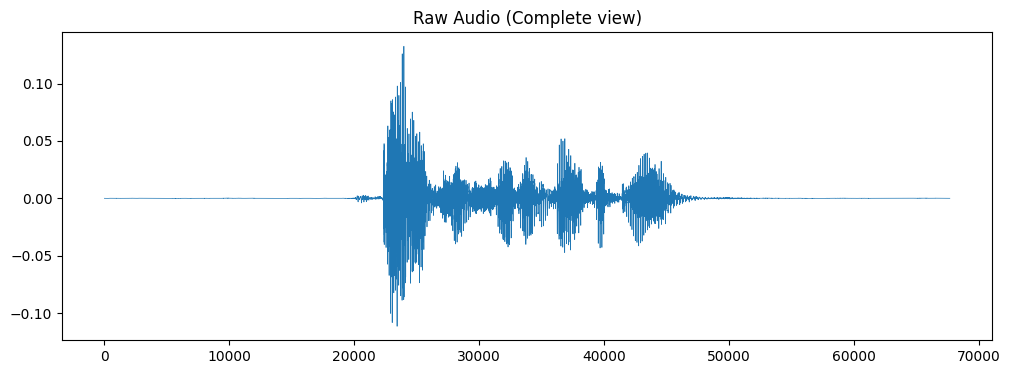

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y,lw=0.5)
plt.title('Raw Audio (Complete view)')
plt.show()

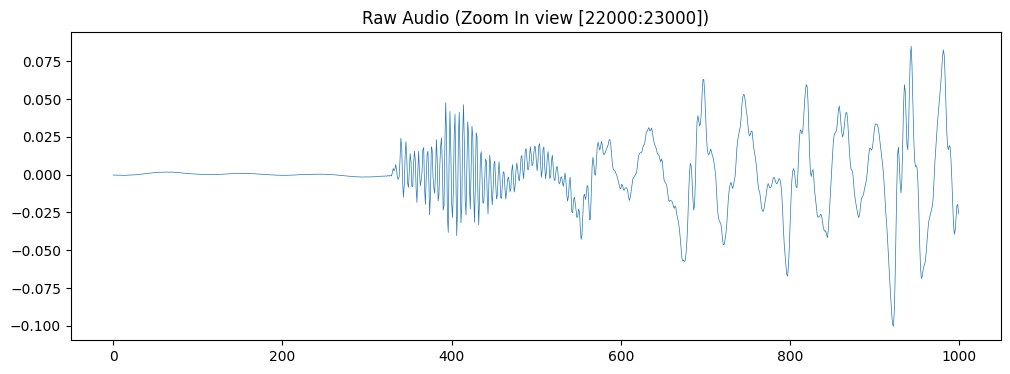

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y[22000:23000],lw=0.5)
plt.title('Raw Audio (Zoom In view [22000:23000])')
plt.show()

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies.

In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the **mel scale**.

A **mel spectrogram** is a spectrogram where the frequencies are converted to the mel scale.

In [ ]:
yt, _ = librosa.effects.trim(y)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

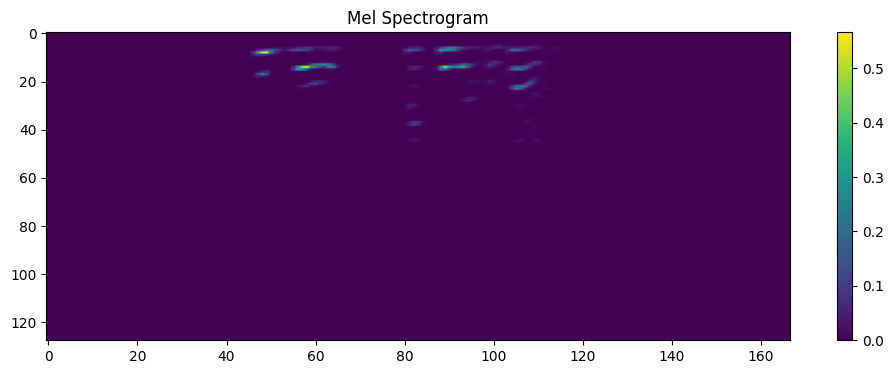

In [ ]:
plt.figure(figsize=(12,4))
plt.imshow(S, aspect='auto')
plt.title('Mel Spectrogram')
plt.colorbar()
plt.show()

Creating the emotions dictionary

In [ ]:
emotions={
  '01':'Neutral',
  '02':'Calm',
  '03':'Happy',
  '04':'Sad',
  '05':'Angry',
  '06':'Fearful',
  '07':'Disgust',
  '08':'Surprised'
}

Generating the numerical dataset

In [ ]:
db_list=[]

for file in audio_files:
  y, sr = librosa.load(file)
  data = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128),axis=1)
  data_list = np.hstack((emotions[file.split("-")[2]],data))
  db_list.append(data_list)

df = pd.DataFrame(db_list)

In [ ]:
print(df.head(5).to_string())

         0              1              2              3              4              5             6             7             8             9             10           11           12            13            14           15            16            17            18            19            20            21             22            23             24             25            26             27             28            29             30             31            32            33             34             35             36            37             38             39            40             41             42             43            44            45             46             47             48             49             50             51             52             53             54             55             56            57             58             59             60             61             62             63             64             65             66             67             

# Model Training & Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.1)

In [ ]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 51.39%
